# Title: INVESTIGATING_EFFECTIVENESS_OF_PEER_EDUCATION_ON_HIV_&_AIDS_AMONG_ADOLESCENTS_IN_EAST_AFRICA

### 1.O LOADING LIBRARIES

In [114]:
# pandas
import pandas as pd

#numpy
import numpy as np

# streamlit
import streamlit as st

### 2.O IMPORTING OUR DATASETS

In [115]:
# data import functions

def LoadData(type,path):
    if type=="csv":
        df = pd.read_csv(path)
    elif type == "excel":
        df = pd.read_excel(path,sheet_name='Data',header=0)
    # changing column names 
    df.columns =[
        'ISO3','Type','Country','UNICEF Region',
        'Indicator','Data Source','Year','Sex','Age','Value',
        'Lower','Upper'
        ]
    # delete first row
    df= df.iloc[1:]
    # remove name age in age 
    return df


def load_csv(file):
    df = pd.read_csv(file)
    
    r_name = {
        'Key indicators in adolescent HIV prevention, 2000-2021': 'ISO3', 
        'Unnamed: 1': 'Country', 
        'Unnamed: 2':'UNICEF Region', 
        'Unnamed: 3':'Indicator', 
        'Unnamed: 4':'Data Source', 
        'Unnamed: 5':'Year', 
        'Unnamed: 6':'Sex', 
        'Unnamed: 7':'Age', 
        'Unnamed: 8':'DISAGG_CATEGORY', 'Unnamed: 9':'DISAGG', 
        'Unnamed: 10':'Value'
    }
    # changing column names 
    df.rename(columns=r_name,inplace=True)
    df.drop(columns=['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14'],axis=1,inplace=True)
    # delete first row
    df= df.iloc[1:]
    return df

In [116]:
# file paths
df_art = LoadData('excel',r'HIV_Adolescent_ART_Coverage_2021.xlsx')

df_prev = load_csv(r'HIV_Prevention_Adolescents_2021.csv')

df_epid = LoadData('excel',r'HIV_Epidemiology_Children_Adolescents_2021.xlsx')


In [117]:
df_art[:1]

,ISO3,Type,Country,UNICEF Region,Indicator,Data Source,Year,Sex,Age,Value,Lower,Upper
1,03M49WLD,Region,NaN,NaN,Per cent of adolescents living with HIV receiv...,UNAIDS 2021 estimates,2010,Both,Age 10-19,10.6,7.8,15.5


In [118]:
df_prev[:1]

,ISO3,Country,UNICEF Region,Indicator,Data Source,Year,Sex,Age,DISAGG_CATEGORY,DISAGG,Value
1,AFG,Afghanistan,South Asia,"Per cent with comprehensive, correct knowledge...",Demographic and Health Survey 2015,2015,Female,15-19,Age,15-19,0.60


In [119]:
df_epid[:1]

,ISO3,Type,Country,UNICEF Region,Indicator,Data Source,Year,Sex,Age,Value,Lower,Upper
1,03M49WLD,Region,Global,NaN,Estimated incidence rate (new HIV infection pe...,UNAIDS 2021 estimates,2000,Both,Age 0-14,0.85,0.56,1.34


### 3.O DATA UNDERSTANDING 

#### 3.0.1 check info

In [120]:
def df_info(df):
    a = df.shape
    b = df.size
    c = df.columns
    d = df.info
    
    return a,b,c,d

In [121]:
df_info(df_art)

((20372, 12),
 244464,
 Index(['ISO3', 'Type', 'Country', 'UNICEF Region', 'Indicator', 'Data Source',
        'Year', 'Sex', 'Age', 'Value', 'Lower', 'Upper'],
       dtype='object'),
 <bound method DataFrame.info of             ISO3    Type Country UNICEF Region  \
 1       03M49WLD  Region     NaN           NaN   
 2       03M49WLD  Region     NaN           NaN   
 3       03M49WLD  Region     NaN           NaN   
 4       03M49WLD  Region     NaN           NaN   
 5       03M49WLD  Region     NaN           NaN   
 ...          ...     ...     ...           ...   
 20368  regionWCA  Region     NaN           NaN   
 20369  regionWCA  Region     NaN           NaN   
 20370  regionWCA  Region     NaN           NaN   
 20371  regionWCA  Region     NaN           NaN   
 20372  regionWCA  Region     NaN           NaN   
 
                                                Indicator  \
 1      Per cent of adolescents living with HIV receiv...   
 2      Per cent of adolescents living with HIV

In [122]:
df_info(df_prev)

((30956, 11),
 340516,
 Index(['ISO3', 'Country', 'UNICEF Region', 'Indicator', 'Data Source', 'Year',
        'Sex', 'Age', 'DISAGG_CATEGORY', 'DISAGG', 'Value'],
       dtype='object'),
 <bound method DataFrame.info of       ISO3      Country            UNICEF Region  \
 1      AFG  Afghanistan               South Asia   
 2      AFG  Afghanistan               South Asia   
 3      AFG  Afghanistan               South Asia   
 4      AFG  Afghanistan               South Asia   
 5      AFG  Afghanistan               South Asia   
 ...    ...          ...                      ...   
 30952  COG        Congo  West and Central Africa   
 30953  COG        Congo  West and Central Africa   
 30954  COG        Congo  West and Central Africa   
 30955  COG        Congo  West and Central Africa   
 30956  COG        Congo  West and Central Africa   
 
                                                Indicator  \
 1      Per cent with comprehensive, correct knowledge...   
 2      Per cent wit

In [123]:
df_info(df_epid)

((173253, 12),
 2079036,
 Index(['ISO3', 'Type', 'Country', 'UNICEF Region', 'Indicator', 'Data Source',
        'Year', 'Sex', 'Age', 'Value', 'Lower', 'Upper'],
       dtype='object'),
 <bound method DataFrame.info of              ISO3    Type                  Country UNICEF Region  \
 1        03M49WLD  Region                   Global           NaN   
 2        03M49WLD  Region                   Global           NaN   
 3        03M49WLD  Region                   Global           NaN   
 4        03M49WLD  Region                   Global           NaN   
 5        03M49WLD  Region                   Global           NaN   
 ...           ...     ...                      ...           ...   
 173249  regionWCA  Region  West and Central Africa           NaN   
 173250  regionWCA  Region  West and Central Africa           NaN   
 173251  regionWCA  Region  West and Central Africa           NaN   
 173252  regionWCA  Region  West and Central Africa           NaN   
 173253  regionWCA  Re

### 4.0 DATA PREPARATION

In [124]:
# Data cleaning
def filter(df):
    countries = ['Kenya','Uganda','United Republic of Tanzania']
    country_series = df['Country'].isin(countries)
    df = df[country_series]
    df = df[(df['Year'] >= 2010 )]
    df['Age'] = df['Age'].str.split(n=1).str[1]
    # Dropping uneccessary columns and duplicates
    df.drop(["UNICEF Region", "Lower" , "Upper","ISO3","Type","Data Source"], axis = 1, inplace = True)
    df.drop_duplicates()
    
    return df

In [125]:
df_art = filter(df_art)

In [126]:
df_epid = filter(df_epid)

In [127]:
df_prev['DISAGG_CATEGORY'].unique()

array(['Age', 'Education', 'Marital status', 'Residence', 'Total',
       'Wealth quintile'], dtype=object)

In [128]:
df_prev['Age'].unique()

array(['15-19', '14-Oct', '20-24'], dtype=object)

In [129]:
df_prev.duplicated().sum()

9

In [130]:
# filter excel
def filter_csv(df):
    countries = ['Kenya','Uganda','United Republic of Tanzania']
    country_series = df['Country'].isin(countries)
    
    df = df[country_series]
    df = df[(df['Year'].astype(int) >= 2010 )]
    df['DISAGG'] = df['DISAGG'].replace('14-Oct', '10-14')
    df['Age'] = df['Age'].replace('14-Oct', '10-14')
    
    
    # Dropping uneccessary columns and duplicates
    df.drop(["UNICEF Region","ISO3","Data Source"], axis = 1, inplace = True)
    df.drop_duplicates()
    return df

In [131]:
df_prev = filter_csv(df_prev)

In [132]:
df_prev.head()

,Country,Indicator,Year,Sex,Age,DISAGG_CATEGORY,DISAGG,Value
3978,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,15-19,Age,15-19,49.00
3979,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Male,15-19,Age,15-19,57.70
3980,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,10-14,Age,10-14,54.20
3981,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,10-14,Education,Higher,77.70
3982,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,10-14,Education,No education,14.00


In [133]:
# remove indicators in df_epid
indicators_epid = ["Estimated number of annual AIDS-related deaths" ,"Estimated number of annual new HIV infections","Estimated number of people living with HIV"]

indicators_series = df_epid['Indicator'].isin(indicators_epid)
df_epid = df_epid[indicators_series]

In [134]:
df_epid

,Country,Indicator,Year,Sex,Age,Value
71383,Kenya,Estimated number of annual AIDS-related deaths,2010,Both,0-14,"14,000"
71384,Kenya,Estimated number of annual AIDS-related deaths,2010,Both,0-19,"15,000"
71385,Kenya,Estimated number of annual AIDS-related deaths,2010,Both,0-4,"8,500"
71386,Kenya,Estimated number of annual AIDS-related deaths,2010,Both,0-9,"11,000"
71387,Kenya,Estimated number of annual AIDS-related deaths,2010,Both,10-14,"2,800"
...,...,...,...,...,...,...
146519,Uganda,Estimated number of people living with HIV,2020,Male,0-9,"27,000"
146520,Uganda,Estimated number of people living with HIV,2020,Male,10-14,"23,000"
146521,Uganda,Estimated number of people living with HIV,2020,Male,10-19,"43,000"
146522,Uganda,Estimated number of people living with HIV,2020,Male,15-19,"21,000"


In [135]:
df_art['Indicator'].unique()

array(['Per cent of adolescents living with HIV receiving ART',
       'Reported number of adolescents receiving ART'], dtype=object)

In [136]:
#removing indicators in df_art 
indicators_art = [
    'Reported number of adolescents receiving ART',
]

indicators_series = df_art['Indicator'].isin(indicators_art)
df_art = df_art[indicators_series]

In [137]:
df_art

,Country,Indicator,Year,Sex,Age,Value
9131,Kenya,Reported number of adolescents receiving ART,2010,Both,10-14,9800
9132,Kenya,Reported number of adolescents receiving ART,2010,Both,10-19,24000
9133,Kenya,Reported number of adolescents receiving ART,2010,Both,15-19,15000
9134,Kenya,Reported number of adolescents receiving ART,2010,Female,10-14,4900
9135,Kenya,Reported number of adolescents receiving ART,2010,Female,10-19,12000
...,...,...,...,...,...,...
18124,Uganda,Reported number of adolescents receiving ART,2020,Female,10-19,43000
18125,Uganda,Reported number of adolescents receiving ART,2020,Female,15-19,29000
18126,Uganda,Reported number of adolescents receiving ART,2020,Male,10-14,14000
18127,Uganda,Reported number of adolescents receiving ART,2020,Male,10-19,30000


In [138]:
df_prev['Indicator'].unique()

array(['Per cent with comprehensive, correct knowledge of HIV',
       'Per cent who had sex with a non-marital, non-cohabitating partner in the past 12 months reporting the use of a condom during their last sexual intercourse',
       'Per cent who have ever been tested for HIV and received the result of the last test',
       'Per cent who know a place to get tested for HIV',
       'Per cent who have been tested for HIV in the last 12 months and received the result of the last test'],
      dtype=object)

##### check null values and duplicates


In [139]:
def nulldup(df):
    # checking for sum of null values
    d = df.isnull().sum()
    
    # checking for duplicates 
    a = df.duplicated().sum()
    
    print(a)
    print(d)

In [140]:
nulldup(df_art)

0
Country      0
Indicator    0
Year         0
Sex          0
Age          0
Value        0
dtype: int64


In [141]:
nulldup(df_prev)

4
Country            0
Indicator          0
Year               0
Sex                0
Age                0
DISAGG_CATEGORY    0
DISAGG             0
Value              0
dtype: int64


In [142]:
df_prev.isnull().values.any()

False

In [143]:
nulldup(df_epid)

0
Country      0
Indicator    0
Year         0
Sex          0
Age          0
Value        0
dtype: int64


# ============ merging our Daata =================

In [144]:
df_prev

,Country,Indicator,Year,Sex,Age,DISAGG_CATEGORY,DISAGG,Value
3978,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,15-19,Age,15-19,49.00
3979,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Male,15-19,Age,15-19,57.70
3980,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,10-14,Age,10-14,54.20
3981,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,10-14,Education,Higher,77.70
3982,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,10-14,Education,No education,14.00
...,...,...,...,...,...,...,...,...
30876,Uganda,Per cent who have been tested for HIV in the l...,2017,Male,15-19,Age,15-19,37.30
30877,Uganda,Per cent who have been tested for HIV in the l...,2017,both,15-19,Age,15-19,43.00
30878,Uganda,Per cent who have been tested for HIV in the l...,2017,Female,20-24,Age,20-24,60.40
30879,Uganda,Per cent who have been tested for HIV in the l...,2017,Male,20-24,Age,20-24,42.60


In [145]:
df_art

,Country,Indicator,Year,Sex,Age,Value
9131,Kenya,Reported number of adolescents receiving ART,2010,Both,10-14,9800
9132,Kenya,Reported number of adolescents receiving ART,2010,Both,10-19,24000
9133,Kenya,Reported number of adolescents receiving ART,2010,Both,15-19,15000
9134,Kenya,Reported number of adolescents receiving ART,2010,Female,10-14,4900
9135,Kenya,Reported number of adolescents receiving ART,2010,Female,10-19,12000
...,...,...,...,...,...,...
18124,Uganda,Reported number of adolescents receiving ART,2020,Female,10-19,43000
18125,Uganda,Reported number of adolescents receiving ART,2020,Female,15-19,29000
18126,Uganda,Reported number of adolescents receiving ART,2020,Male,10-14,14000
18127,Uganda,Reported number of adolescents receiving ART,2020,Male,10-19,30000


In [146]:
df_epid

,Country,Indicator,Year,Sex,Age,Value
71383,Kenya,Estimated number of annual AIDS-related deaths,2010,Both,0-14,"14,000"
71384,Kenya,Estimated number of annual AIDS-related deaths,2010,Both,0-19,"15,000"
71385,Kenya,Estimated number of annual AIDS-related deaths,2010,Both,0-4,"8,500"
71386,Kenya,Estimated number of annual AIDS-related deaths,2010,Both,0-9,"11,000"
71387,Kenya,Estimated number of annual AIDS-related deaths,2010,Both,10-14,"2,800"
...,...,...,...,...,...,...
146519,Uganda,Estimated number of people living with HIV,2020,Male,0-9,"27,000"
146520,Uganda,Estimated number of people living with HIV,2020,Male,10-14,"23,000"
146521,Uganda,Estimated number of people living with HIV,2020,Male,10-19,"43,000"
146522,Uganda,Estimated number of people living with HIV,2020,Male,15-19,"21,000"


In [147]:
df_merge = pd.concat([df_art, df_epid], ignore_index= True)

In [148]:
df_merge.isnull().sum()

Country      0
Indicator    0
Year         0
Sex          0
Age          0
Value        0
dtype: int64

In [149]:
df_merge = df_merge.loc[df_merge['Age'].isin(['10-14','15-19'])]

In [152]:
df_merge

,Country,Indicator,Year,Sex,Age,Value
0,Kenya,Reported number of adolescents receiving ART,2010,Both,10-14,9800
2,Kenya,Reported number of adolescents receiving ART,2010,Both,15-19,15000
3,Kenya,Reported number of adolescents receiving ART,2010,Female,10-14,4900
5,Kenya,Reported number of adolescents receiving ART,2010,Female,15-19,7200
6,Kenya,Reported number of adolescents receiving ART,2010,Male,10-14,4900
...,...,...,...,...,...,...
2457,Uganda,Estimated number of people living with HIV,2020,Both,15-19,"59,000"
2463,Uganda,Estimated number of people living with HIV,2020,Female,10-14,"22,000"
2465,Uganda,Estimated number of people living with HIV,2020,Female,15-19,"38,000"
2471,Uganda,Estimated number of people living with HIV,2020,Male,10-14,"23,000"


## 5.0 DATA ANALYSIS

### view all our data

In [156]:
df_prev.head()

,Country,Indicator,Year,Sex,Age,DISAGG_CATEGORY,DISAGG,Value
3978,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,15-19,Age,15-19,49.00
3979,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Male,15-19,Age,15-19,57.70
3980,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,10-14,Age,10-14,54.20
3981,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,10-14,Education,Higher,77.70
3982,Kenya,"Per cent with comprehensive, correct knowledge...",2014,Female,10-14,Education,No education,14.00


In [155]:
df_merge.head()

,Country,Indicator,Year,Sex,Age,Value
0,Kenya,Reported number of adolescents receiving ART,2010,Both,10-14,9800
2,Kenya,Reported number of adolescents receiving ART,2010,Both,15-19,15000
3,Kenya,Reported number of adolescents receiving ART,2010,Female,10-14,4900
5,Kenya,Reported number of adolescents receiving ART,2010,Female,15-19,7200
6,Kenya,Reported number of adolescents receiving ART,2010,Male,10-14,4900


# RESEARCH QUESTIONS

> What is the percentage of adolescents well informed about HIV AIDS depending on their residence and education status? 

> What is the survival and mortality rate for adolescents living with HIV in the past 10 years in relation to those who have knowledge on HIV & AIDS ?

> What is the rate of HIV mortality in relation to HIV knowledge in between those of ages (10-14  and 15 - 19)?

> What is the comparison between those who have knowledge on HIV & AIDS in Rural areas and those in urban areas


### Q1 : What is the percentage of adolescents well informed about HIV AIDS depending on their residence and education status in East Africa? 

#### By residence : Urban and Rural

In [314]:
# rural
residence = ['Rural','Urban']

residence_df = df_prev.loc[df_prev['DISAGG'].isin(residence)]
residence_df['Value'] = residence_df['Value'].astype(float)

residence_df = residence_df.groupby(['Country','DISAGG'])['Value'].mean().reset_index(name="Percent_in_Rural_Urban")

/tmp/ipykernel_123745/2038493462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residence_df['Value'] = residence_df['Value'].astype(float)


#### By Education: Higher Primary Secondary No Education

In [208]:
education = ['Higher', 'Primary', 'Secondary']

learned = df_prev.loc[df_prev['DISAGG'].isin(education)]

learned['Value'] = learned['Value'].astype(float)

learned = learned.groupby(['Country'])['Value'].mean().reset_index(name="Percent_of_Educated")

/tmp/ipykernel_123745/3239919978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  learned['Value'] = learned['Value'].astype(float)


## Q2:  What is the survival and mortality rate for adolescents living with HIV in the past 10 years in relation to those who have knowledge on HIV & AIDS ?


In [167]:
df_merge['Year'].head()

2020

In [164]:
df_merge['Indicator'].unique()

array(['Reported number of adolescents receiving ART',
       'Estimated number of annual AIDS-related deaths',
       'Estimated number of annual new HIV infections',
       'Estimated number of people living with HIV'], dtype=object)

In [165]:
df_prev['Indicator'].unique()

array(['Per cent with comprehensive, correct knowledge of HIV',
       'Per cent who had sex with a non-marital, non-cohabitating partner in the past 12 months reporting the use of a condom during their last sexual intercourse',
       'Per cent who have ever been tested for HIV and received the result of the last test',
       'Per cent who know a place to get tested for HIV',
       'Per cent who have been tested for HIV in the last 12 months and received the result of the last test'],
      dtype=object)

In [190]:
df_merge['Value'] = df_merge['Value'].replace(',', '',regex=True)
df_merge['Value'] = df_merge['Value'].replace('<', '',regex=True)

In [202]:


# --------------------------------------survival

suv = [
'Estimated number of people living with HIV']

surv_df = df_merge.loc[df_merge['Indicator'].isin(suv)]

surv_df['Value'] = surv_df['Value'].astype(str).astype(int)

surv_df = surv_df.groupby(['Country'])['Value'].sum().reset_index(name="Total_Living")


# --------------------------------------mortality
mot = ['Estimated number of annual AIDS-related deaths',
]


mot_df = df_merge.loc[df_merge['Indicator'].isin(mot)]

mot_df['Value'] = mot_df['Value'].astype(str).astype(int)

mot_df = mot_df.groupby(['Country'])['Value'].sum().reset_index(name="Total_Mortality")

#------------------------------------- new infections
new_infect = ['Estimated number of annual new HIV infections',
]


new_infect_df = df_merge.loc[df_merge['Indicator'].isin(new_infect)]

new_infect_df['Value'] = new_infect_df['Value'].astype(str).astype(int)

new_infect_df = new_infect_df.groupby(['Country'])['Value'].sum().reset_index(name="Total_of_new_Infect")

/tmp/ipykernel_123745/1160423029.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv_df['Value'] = surv_df['Value'].astype(str).astype(int)
/tmp/ipykernel_123745/1160423029.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mot_df['Value'] = mot_df['Value'].astype(str).astype(int)
/tmp/ipykernel_123745/1160423029.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [203]:
# survived 
surv_df

,Country,Total_Living
0,Kenya,2766000
1,Uganda,2386000
2,United Republic of Tanzania,2421000


In [204]:
# mortality
mot_df

,Country,Total_Mortality
0,Kenya,67440
1,Uganda,62150
2,United Republic of Tanzania,64560


In [209]:
learned

,Country,Percent_of_Educated
0,Kenya,76.233333
1,Uganda,66.629630
2,United Republic of Tanzania,67.016327


In [283]:


df_merged_all = surv_df.merge(mot_df, on='Country', how='left').merge(new_infect_df, on='Country', how='left').merge(learned, on='Country', how='left')

df_merged_all

,Country,Total_Living,Total_Mortality,Total_of_new_Infect,Percent_of_Educated
0,Kenya,2766000,67440,177060,76.233333
1,Uganda,2386000,62150,216410,66.629630
2,United Republic of Tanzania,2421000,64560,249700,67.016327


In [284]:
df_merged_all['Total'] = (df_merged_all['Total_Living'] + df_merged_all['Total_of_new_Infect'] +  df_merged_all['Total_Mortality'] )

In [285]:
df_merged_all

,Country,Total_Living,Total_Mortality,Total_of_new_Infect,Percent_of_Educated,Total
0,Kenya,2766000,67440,177060,76.233333,3010500
1,Uganda,2386000,62150,216410,66.629630,2664560
2,United Republic of Tanzania,2421000,64560,249700,67.016327,2735260


## Q3: Rate of People Knowledge about HIV to Survival, Mortality and New Infection

In [292]:

df_merged_all['%_living_educated'] = (
    df_merged_all['Total_Living'] / df_merged_all['Total']
) * 100

df_merged_all['%_mortality_educated'] = (
    df_merged_all['Total_Mortality'] / df_merged_all['Total']
) * 100


df_merged_all['%_new_infected_educated'] = (
    df_merged_all['Total_of_new_Infect'] / df_merged_all['Total']
) * 100


In [293]:
df_merged_all

,Country,Total_Living,Total_Mortality,Total_of_new_Infect,Percent_of_Educated,Total,%_living_educated,%_mortality_educated,%_new_educated,%_new_infected_educated
0,Kenya,2766000,67440,177060,76.233333,3010500,91.878426,2.240159,5.881415,5.881415
1,Uganda,2386000,62150,216410,66.629630,2664560,89.545741,2.332468,8.121791,8.121791
2,United Republic of Tanzania,2421000,64560,249700,67.016327,2735260,88.510781,2.360288,9.128931,9.128931


## Q4: Rate of Survival,Mortality and Newly infected with HIV in relation to Residence

In [320]:
all_merged = df_merged_all.merge(residence_df, on='Country', how='left')

In [321]:
all_merged

,Country,Total_Living,Total_Mortality,Total_of_new_Infect,Percent_of_Educated,Total,%_living_educated,%_mortality_educated,%_new_educated,%_new_infected_educated,DISAGG,Percent_in_Rural_Urban
0,Kenya,2766000,67440,177060,76.233333,3010500,91.878426,2.240159,5.881415,5.881415,Rural,68.040000
1,Kenya,2766000,67440,177060,76.233333,3010500,91.878426,2.240159,5.881415,5.881415,Urban,76.330000
2,Uganda,2386000,62150,216410,66.629630,2664560,89.545741,2.332468,8.121791,8.121791,Rural,56.611111
3,Uganda,2386000,62150,216410,66.629630,2664560,89.545741,2.332468,8.121791,8.121791,Urban,68.688889
4,United Republic of Tanzania,2421000,64560,249700,67.016327,2735260,88.510781,2.360288,9.128931,9.128931,Rural,54.047368
5,United Republic of Tanzania,2421000,64560,249700,67.016327,2735260,88.510781,2.360288,9.128931,9.128931,Urban,66.831579


In [308]:
all_merged['%_living_residence'] = (
    (all_merged['Total_Living'] / all_merged['Total'] ) 
)*  all_merged['Percent_in_Rural_Urban']

all_merged['%_mortality_residence'] = (
    (all_merged['Total_Mortality'] / all_merged['Total'] ) 
)* all_merged['Percent_in_Rural_Urban']


all_merged['%_new_infected_recidence'] = (
   (all_merged['Total_of_new_Infect'] / all_merged['Total'] ) 
)* all_merged['Percent_in_Rural_Urban']


In [309]:
all_merged

,Country,Total_Living,Total_Mortality,Total_of_new_Infect,Percent_of_Educated,Total,%_living_educated,%_mortality_educated,%_new_educated,%_new_infected_educated,DISAGG,Percent_in_Rural_Urban,%_living_residence,%_mortality_residence,%_new_infected_recidence
0,Kenya,2766000,67440,177060,76.233333,3010500,91.878426,2.240159,5.881415,5.881415,Rural,68.040000,62.514081,1.524204,4.001715
1,Kenya,2766000,67440,177060,76.233333,3010500,91.878426,2.240159,5.881415,5.881415,Urban,76.330000,70.130802,1.709914,4.489284
2,Uganda,2386000,62150,216410,66.629630,2664560,89.545741,2.332468,8.121791,8.121791,Rural,56.611111,50.692839,1.320436,4.597836
3,Uganda,2386000,62150,216410,66.629630,2664560,89.545741,2.332468,8.121791,8.121791,Urban,68.688889,61.507975,1.602146,5.578768
4,United Republic of Tanzania,2421000,64560,249700,67.016327,2735260,88.510781,2.360288,9.128931,9.128931,Rural,54.047368,47.837748,1.275673,4.933947
5,United Republic of Tanzania,2421000,64560,249700,67.016327,2735260,88.510781,2.360288,9.128931,9.128931,Urban,66.831579,59.153153,1.577417,6.101009


## 6.0 DATA VISUALIZATION

In [322]:
# export our data 
all_merged.to_csv(r'File Name.csv', index = False)

In [333]:
all_merged

,Country,Total_Living,Total_Mortality,Total_of_new_Infect,Percent_of_Educated,Total,%_living_educated,%_mortality_educated,%_new_educated,%_new_infected_educated,DISAGG,Percent_in_Rural_Urban
0,Kenya,2766000,67440,177060,76.233333,3010500,91.878426,2.240159,5.881415,5.881415,Rural,68.040000
1,Kenya,2766000,67440,177060,76.233333,3010500,91.878426,2.240159,5.881415,5.881415,Urban,76.330000
2,Uganda,2386000,62150,216410,66.629630,2664560,89.545741,2.332468,8.121791,8.121791,Rural,56.611111
3,Uganda,2386000,62150,216410,66.629630,2664560,89.545741,2.332468,8.121791,8.121791,Urban,68.688889
4,United Republic of Tanzania,2421000,64560,249700,67.016327,2735260,88.510781,2.360288,9.128931,9.128931,Rural,54.047368
5,United Republic of Tanzania,2421000,64560,249700,67.016327,2735260,88.510781,2.360288,9.128931,9.128931,Urban,66.831579


In [347]:

# importing matplotlib module 
from matplotlib import pyplot as plt 

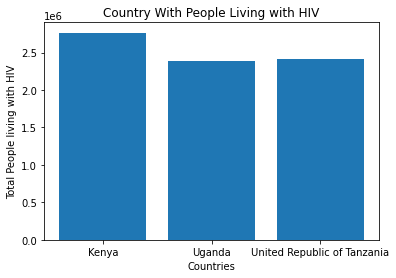

In [352]:
# country with total living
x = all_merged['Country'].values.tolist()

y = all_merged['Total_Living'].values.tolist()
  
# Function to plot 
plt.bar(x, y) 


# Adding Title
plt.title("Country With People Living with HIV")
  
# Labeling the axes
plt.xlabel("Countries")
plt.ylabel("Total People living with HIV")

plt.show()

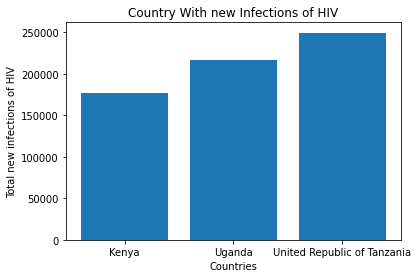

In [353]:
# country with new infections
x = all_merged['Country'].values.tolist()

y = all_merged['Total_of_new_Infect'].values.tolist()
  
# Function to plot 
plt.bar(x, y) 


# Adding Title
plt.title("Country With new Infections of HIV")
  
# Labeling the axes
plt.xlabel("Countries")
plt.ylabel("Total new infections of HIV")

plt.show()

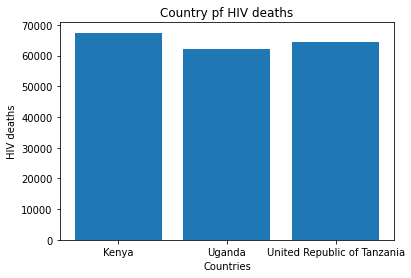

In [354]:
# country HIV deaths
x = all_merged['Country'].values.tolist()

y = all_merged['Total_Mortality'].values.tolist()
  
# Function to plot 
plt.bar(x, y) 


# Adding Title
plt.title("Country of HIV deaths")
  
# Labeling the axes
plt.xlabel("Countries")
plt.ylabel("HIV deaths")

plt.show()

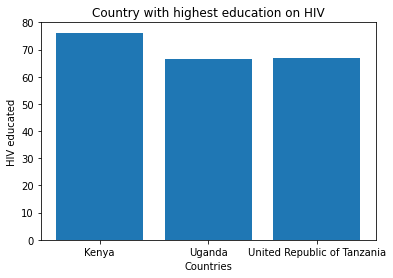

In [356]:
# country educated
x = all_merged['Country'].values.tolist()

y = all_merged['Percent_of_Educated'].values.tolist()
  
# Function to plot 
plt.bar(x, y) 


# Adding Title
plt.title("Country with highest education on HIV")
  
# Labeling the axes
plt.xlabel("Countries")
plt.ylabel("HIV educated")

plt.show()

<AxesSubplot:xlabel='Country'>

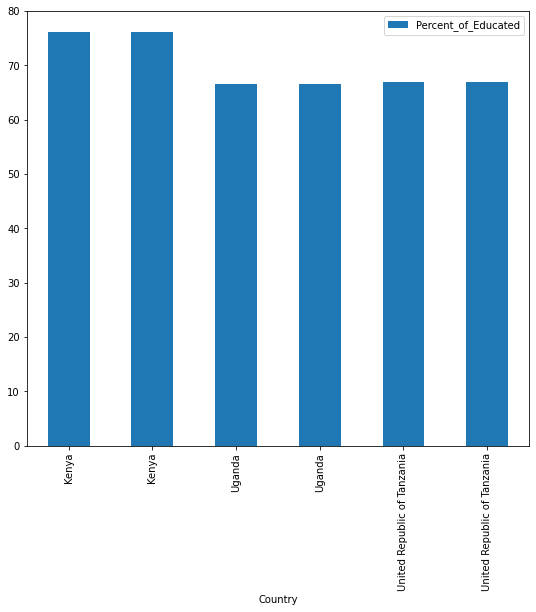

In [379]:
# Comparison of Country Education

# form dataframe
data_1 = pd.DataFrame(all_merged)
data_2 = pd.DataFrame(df_merged_all)

df = pd.DataFrame(data_1, columns=["Country","Percent_of_Educated"])
  
# plot the dataframe
df.plot(x="Country", y=["Percent_of_Educated"], kind="bar", figsize=(9, 8))

<AxesSubplot:xlabel='DISAGG'>

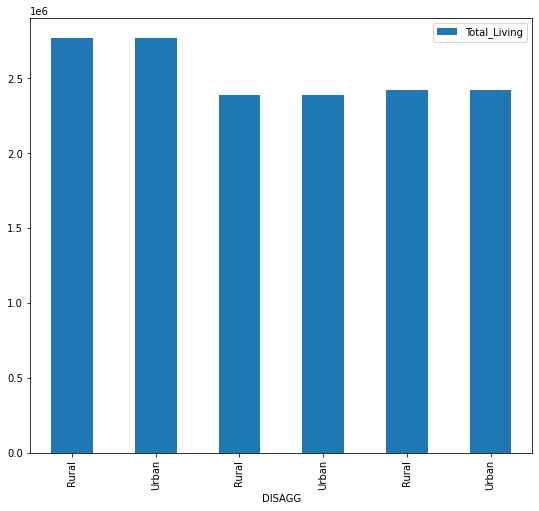

In [380]:
# Comparison of Country to Rural to Urban infections

# form dataframe

df = pd.DataFrame(data_1, columns=["DISAGG","Total_Living"])
  
# plot the dataframe
df.plot(x="DISAGG", y=["Total_Living"], kind="bar", figsize=(9, 8))

In [381]:
data_2

,Country,Total_Living,Total_Mortality,Total_of_new_Infect,Percent_of_Educated,Total,%_living_educated,%_mortality_educated,%_new_educated,%_new_infected_educated
0,Kenya,2766000,67440,177060,76.233333,3010500,91.878426,2.240159,5.881415,5.881415
1,Uganda,2386000,62150,216410,66.629630,2664560,89.545741,2.332468,8.121791,8.121791
2,United Republic of Tanzania,2421000,64560,249700,67.016327,2735260,88.510781,2.360288,9.128931,9.128931


<AxesSubplot:xlabel='Country'>

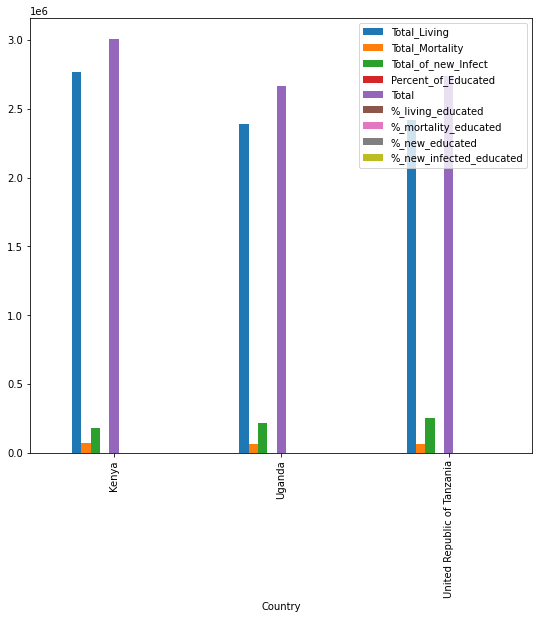

In [382]:
df = pd.DataFrame(data_2, columns=[
    "Country",
    "Total_Living",
    "Total_Mortality",
    "Total_of_new_Infect",
    "Percent_of_Educated",
    "Total",
    "%_living_educated",
    "%_mortality_educated",
    "%_new_educated",
    "%_new_infected_educated"
])
  
# plot the dataframe
df.plot(x="Country", y=[
    "Total_Living",
    "Total_Mortality",
    "Total_of_new_Infect",
    "Percent_of_Educated",
    "Total",
    "%_living_educated",
    "%_mortality_educated",
    "%_new_educated",
    "%_new_infected_educated"], kind="bar", figsize=(9, 8))

<AxesSubplot:xlabel='Country'>

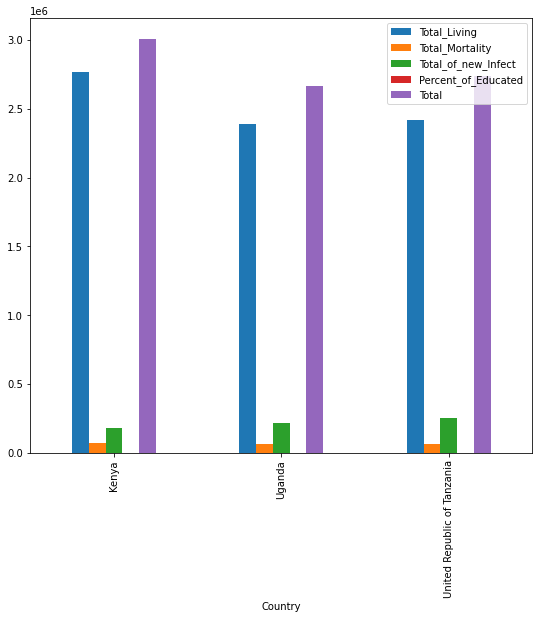

In [383]:
df = pd.DataFrame(data_2, columns=[
"Country","Total_Living","Total_Mortality","Total_of_new_Infect","Percent_of_Educated","Total"
])
  
# plot the dataframe
df.plot(x="Country", y=[
    "Total_Living",
    "Total_Mortality","Total_of_new_Infect",
    "Percent_of_Educated","Total"], kind="bar", figsize=(9, 8))

<AxesSubplot:xlabel='DISAGG'>

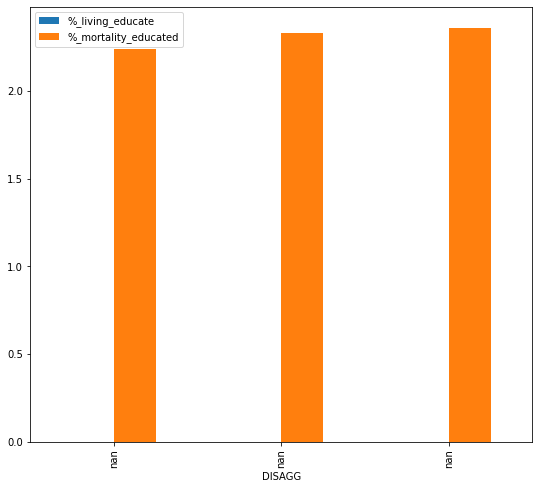

In [390]:


df = pd.DataFrame(data_2, columns=["DISAGG",
"%_living_educate","%_mortality_educated"
])

# plot the dataframe
df.plot(x="DISAGG", y=[
"%_living_educate","%_mortality_educated"
], kind="bar", figsize=(9, 8))